In [1]:
# simulation to understand biostatistics

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import t as tpdf
from math import *

N_per_day=10; 
N_days=3;

true_exp_mean=0.8;
true_control_mean=0.8;

inter_day_SD=0.25; #um/s
sigma=0.3; #intra_day_SD;


mean_exp=true_exp_mean+inter_day_SD*np.random.randn(1,N_days);
mean_control=true_control_mean+inter_day_SD*np.random.randn(1,N_days);


day_exp=mean_exp+sigma*np.random.randn(N_per_day,N_days);
day_control=mean_control+sigma*np.random.randn(N_per_day,N_days);
mexp=np.mean(day_exp,axis=0);
mctr=np.mean(day_control,axis=0);

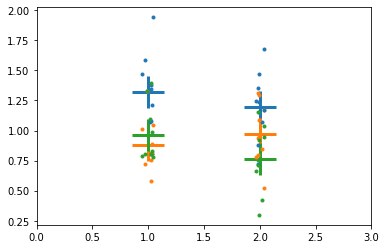

In [2]:
fig, ax = plt.subplots()
fig = plt.plot(np.ones((N_per_day,1))+0.05/sqrt(N_days)*np.random.randn(N_per_day,1), day_exp,'.',markersize=6)

colord = []
for i in range(len(fig)):
    colord.append(fig[i].get_color())
#print(colord)
col=colord

plt.scatter(np.ones(N_days), mexp, 1000, col,'+',lineWidths=3)

arr_control=2*np.ones((N_per_day,1))+0.05/sqrt(N_days)*np.random.randn(N_per_day,1)
for i in range(N_per_day):
    for j in range(N_days):
        plt.plot(arr_control[i], day_control[i][j],'.',markersize=6,color=col[j])
plt.scatter(2*np.ones(N_days), mctr, 1000, col,'+',lineWidths=3)

ax.set_xlim(0,3)
plt.show()

In [3]:
exp_pooled=[]
ctr_pooled=[]

for i in range(N_per_day):
    for j in range(N_days):
        exp_pooled.append(day_exp[i][j])
        ctr_pooled.append(day_control[i][j])
exp_dayly=mexp
ctr_dayly=mctr

ICC=inter_day_SD**2/(inter_day_SD**2+sigma**2);

h,p_pool = ttest_ind(exp_pooled,ctr_pooled);
if h==0:
    print('Means are the same (pooled data), p-value is {:2.2f}'.format(p_pool))
else:
    print('Means are different (pooled data), p-value is {:2.2f}'.format(p_pool))

h,p_mean = ttest_ind(exp_dayly,ctr_dayly);
if h==0:
    print('Means are the same (per-day means), p-value is {:2.2f}'.format(p_mean))
else:
    print('Means are different (per-day means), p-value is {:2.2f}'.format(p_mean))

print('Mean value in experiment {:2.2f}'.format(np.mean(exp_dayly)))
print('Mean value in control {:2.2f} \n'.format(np.mean(ctr_dayly)))

Means are different (pooled data), p-value is 0.35
Means are different (per-day means), p-value is 0.70
Mean value in experiment 1.05
Mean value in control 0.98 



In [4]:
# Total number of days
N=N_per_day*N_days
# correction factor for t-distribution
c=sqrt(((N-2)-2*(N_per_day-1)*ICC)/((N-2)*(1+(N_per_day-1)*ICC)))
# corrected degrees of freedom
df=((N-2)-2*(N_per_day-1)*ICC)**2/((N-2)*(1-ICC)**2+N_per_day-1*(N-2*N_per_day-1)*ICC+2*(N-2*N_per_day)*ICC*(1-ICC))
# standard deviation of two datasets
s=sqrt(((N-1)*np.std(exp_pooled)**2+(N-1)*np.std(ctr_pooled)**2)/(2*N-2))
# t-test
t=abs(np.mean(exp_pooled)-np.mean(ctr_pooled))/(s*sqrt(1/N+1/N))
# corrected t-test
ta=c*t
# p-value = integral of t-distribution probability function
pval=2*sum(tpdf.pdf(np.arange(ta,100,0.001),df)*0.001)
print('P-value based on t-distribution probability function is {:2.2f}'.format(pval))

P-value based on t-distribution probability function is 0.71
